
<a href="https://colab.research.google.com/github/kokchun/Databehandling-AI22/blob/main/Exercises/E02_merging.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Merging exercises

---
These are introductory exercises in Pandas with focus in **syntax, indexing, data selection, missing data, aggregations, visualizations**, **data cleaning**, **merging**, **concatenation**, **joining**, **parse html tables** .

<p class = "alert alert-info" role="alert"><b>Note</b> all datasets used in this exercise can be found under Data folder of the course Github repo</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that there are usually many ways to achieve same results using operations in pandas. Feel free to investigate several ways. </p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to format your input questions in a pedagogical way to guide the user

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Swedish demographic data (*)

Go to Swedish-language wikipedia page [Sveriges demografi](https://sv.wikipedia.org/wiki/Sveriges_demografi). 

&nbsp; a) Read in the table under "Befolkningsstatistik sedan 1900" into a DataFrame

&nbsp; b) Choose to do some EDA (exploratory data analysis) on this dataset. And draw some relevant graphs.

&nbsp; c) Now we want to go backwards in time (before 1900) to see how population has changed in Sweden. Read in the table under history and keep the data of "Folkmängd" from 1570-1865. 

| År   | Folkmängd |
| ---- | --------- | 
| 1570 | 900000    |     
| 1650 | 1225000   |
| 1700 | 1485000   |
| 1720 | 1350000   |
| 1755 | 1878000   |
| 1815 | 2465000   |
| 1865 | 4099000   |


&nbsp; d) Now concatenate this with the table from 1900 so that you have population data from 1570 to 2020. Note that you may need to clean the data in order for it to fit properly. Also you may be able to do this in several ways. 

&nbsp; e) Draw a graph of population data from 1570-2020.

<details>
<summary>Hint</summary>

Useful methods:
- append()
- join()
- concat()
- merge()

</details>

<br/>

<details>

<summary>Answer</summary>

![Sweden population data 1952-2020](../assets/sverige_befolkning_tid.png)

</details>

Go to Swedish-language wikipedia page [Sveriges demografi](https://sv.wikipedia.org/wiki/Sveriges_demografi). 

&nbsp; a) Read in the table under "Befolkningsstatistik sedan 1900" into a DataFrame

In [175]:

swe_demo = pd.read_html("https://sv.wikipedia.org/wiki/Sveriges_demografi", decimal=",", thousands=" ", match = "1900")[2] # Create Dataframe 
# Decimal check 

len(swe_demo), type(swe_demo)
swe_demo.rename(columns={"Unnamed: 0": "År", "Medel- folkmängd": "Medel folkmängd"}, inplace= True)


In [176]:


swe_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   År                                         122 non-null    int64  
 1   Medel folkmängd                            122 non-null    float64
 2   Födda                                      122 non-null    int64  
 3   Döda                                       122 non-null    int64  
 4   Naturlig befolkningsförändring             122 non-null    int64  
 5   Nativitet (per 1000)                       122 non-null    float64
 6   Dödstal (per 1000)                         122 non-null    float64
 7   Naturlig befolkningsförändring (per 1000)  122 non-null    float64
 8   Total fertilitet                           121 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 8.7 KB


In [174]:
len(swe_demo), type(swe_demo)

swe_demo.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   År                                         122 non-null    int64  
 1   Medel folkmängd                            122 non-null    float64
 2   Födda                                      122 non-null    int64  
 3   Döda                                       122 non-null    int64  
 4   Naturlig befolkningsförändring             122 non-null    int64  
 5   Nativitet (per 1000)                       122 non-null    float64
 6   Dödstal (per 1000)                         122 non-null    float64
 7   Naturlig befolkningsförändring (per 1000)  122 non-null    float64
 8   Total fertilitet                           121 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 8.7 KB


&nbsp; b) Choose to do some EDA (exploratory data analysis) on this dataset. And draw some relevant graphs.

<AxesSubplot: xlabel='År', ylabel='Födda'>

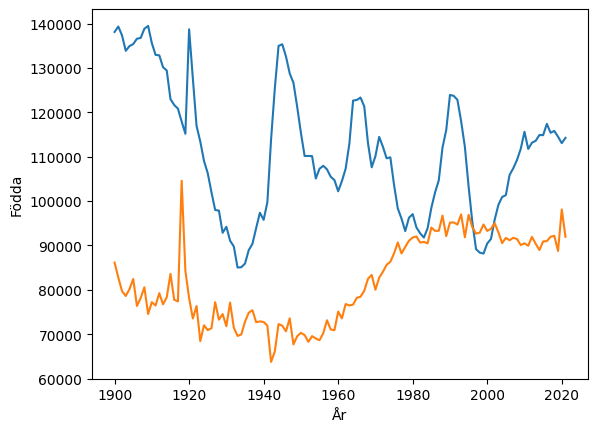

In [213]:
data = swe_demo
födda = swe_demo["Födda"]
döda = swe_demo["Döda"]
år = "År"



#sns.lineplot(data= data, x="Medel folkmängd", y=y)
#sns.scatterplot()
sns.lineplot(data= data, x=år, y=födda)
sns.lineplot(data= data, x=år, y=döda)
#sns.lineplot(data=swe_demo["År"])
#swe_demo["Födda"].head()

In [219]:
import plotly_express as px
test = swe_demo["Medel folkmängd"]

fig = px.line(
    swe_demo,
    x="År",
    y="Medel folkmängd",
    color="Total fertilitet",
    title="Medel folkmängd per år",
    labels=dict(test="Medel", år="År"),
)
fig.update_layout(hovermode="x") # Try "y" for good times
fig.update_xaxes(
    showspikes=True, spikedash="solid", spikecolor="white", spikemode="across", spikesnap ="cursor"
)
fig.show()

&nbsp; c) Now we want to go backwards in time (before 1900) to see how population has changed in Sweden. Read in the table under history and keep the data of "Folkmängd" from 1570-1865. 

| År   | Folkmängd |
| ---- | --------- | 
| 1570 | 900000    |     
| 1650 | 1225000   |
| 1700 | 1485000   |
| 1720 | 1350000   |
| 1755 | 1878000   |
| 1815 | 2465000   |
| 1865 | 4099000   |

In [359]:

swe_old = pd.read_html("https://sv.wikipedia.org/wiki/Sveriges_demografi", thousands= " ", match = "Vid utgången av år", header = 1, skiprows=[9, 10, 11, 12])[0]
swe_old.pop("Totalt")
swe_old.pop("Promille")

swe_old.rename(columns={"Vid utgången av år": "År"}, inplace= True)

#swe_old["Folkmängd"].astype(float)
len(swe_old)
#swe_old.drop(["1900", "2000", "2020", "Datan avser folkmängden inom Sveriges nuvarande gränser."], inplace=True)
#swe_old.drop([7, 8, 9, 10], inplace=True) # Used skip rows instead when we read in data for same result


#swe_old.set_index("År", inplace=True)
swe_old["Folkmängd"][0] = swe_old["Folkmängd"][0].replace(u'\xa0', u'') # This is horrid... This is absolute trash, and I hate it.
swe_old["Folkmängd"][0]

C:\Users\Agam\AppData\Local\Temp\ipykernel_16652\1771762813.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



'900000'

&nbsp; d) Now concatenate this with the table from 1900 so that you have population data from 1570 to 2020. Note that you may need to clean the data in order for it to fit properly. Also you may be able to do this in several ways. 


&nbsp; e) Draw a graph of population data from 1570-2020.

---
## 2. Denmark demographic data (*)

Go to the Danish-language wikipedia page [Danmarks demografi](https://da.wikipedia.org/wiki/Danmarks_demografi). 

&nbsp; a) Read in the table under "Demografiske data" into a DataFrame (*)

&nbsp; b) Clean the data and draw a graph of population against year from 1769-2020. (**)


---
## 3. Norwegian demographic data (*)

Go to Swedish-language wikipedia page [Norges demografi](https://sv.wikipedia.org/wiki/Norges_demografi). 

&nbsp; a) Read in the table under "Befolkningsstatistik sedan 1900" into a DataFrame

&nbsp; b) You see some missing data in column "Total fertilitet". Go to the [English page](https://en.wikipedia.org/wiki/Demographics_of_Norway) and read in the data from "Vital statistics since 1900".  

&nbsp; c) Pick out the fertility column from b) dataset, merge it into a) dataset and clean the data so that you only have columns "År", "Folkmängd", "Fertilitet". 


---
## 4. Merge Sweden-Norway (*)

Create a population graph and a fertility graph showing Sweden and Norway.

<details>

<summary>Answer</summary>

![Fertilitet Norge och Sverige](../assets/fertilitet_sv_no.png)

![Folkmängd Norge och Sverige](../assets/folkmangd_sverige_norge.png)

</details>

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---